# French road analysis

Hello world, our goal here is to plot french trafic roads density per year and compare the evolution of it.

## Import packages

In [1]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load datasets

[source](https://www.data.gouv.fr/fr/datasets/trafic-moyen-journalier-annuel-sur-le-reseau-routier-national)

**French documentation :**

<hr>

Chaque section de route est définie par :

    son nom (route)
    sa longueur
    ses coordonnées de début (D) et de fin (F) exprimées en coordonnées (X, Y, Z) ou par un système de repérage routier composé de 4 attributs :
        pr = Point de repère routier
        depPr = département où se situe le PR
        concessionPr = indique si le PR se trouve sur une section concédée (C) ou non (N)
        abs = abscisse ou distance (en mètres) séparant le point du PR auquel il se rattache

D'autres attributs complètent ces attributs de localisation :

    anneeMesureTrafic = année pendant laquelle ont été effectuée les mesures
    TypeComptageTrafic = indique si le comptage des véhicules a été effectué à partir d'un système placé en permanence sur la route ou s'il s'agit d'un relevé à l'aide d'un système de comptage temporaire
    TMJA = trafic moyen journalier annuel
    RatioPL = pourcentage de poids-lourds entrant dans la composition du TMJA
    
    
<hr>

### Load shape file dataset

This is the dataset that contains shape of all french roads.

To start we'll only analyse data for one year.

In [2]:
shp_file = 'data/TMJA2017_SHP.shp'
road_data = gpd.read_file(shp_file)
# road_data = pd.read_csv('tmja-2017.csv', sep='\t')

## Save original data

In [3]:
road_data_orig = road_data.copy()

In [4]:
road_data.shape

(4354, 24)

In [5]:
road_data.columns

Index(['dateRefere', 'route', 'longueur', 'prD', 'depPrD', 'concession',
       'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF', 'concessi_1',
       'absF', 'cumulF', 'xF', 'yF', 'zF', 'anneeMesur', 'typeComp_1', 'tmja',
       'pctPL', 'geometry'],
      dtype='object')

In [6]:
road_data.head().T

,0,1,2,3,4
dateRefere,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01
route,A0001,A0001,A0001,A0001,A0001
longueur,2440,785.2,401.8,820.5,229.5
prD,0,2,3,3,4
depPrD,93,93,93,93,93
concession,N,N,N,N,N
absD,0,460,248.2,650,460.5
cumulD,0,2440,3225.2,3627,4447.5
xD,653007,652897,653176,653553,654322
yD,6.86704e+06,6.86947e+06,6.8701e+06,6.87023e+06,6.87052e+06


## Create ID for measure point

In [11]:
road_data['route_pr_id'] = road_data['route'] + '_' + road_data['prD'] + '_' + road_data['prF']

## EDA (Exploratory data analysis)

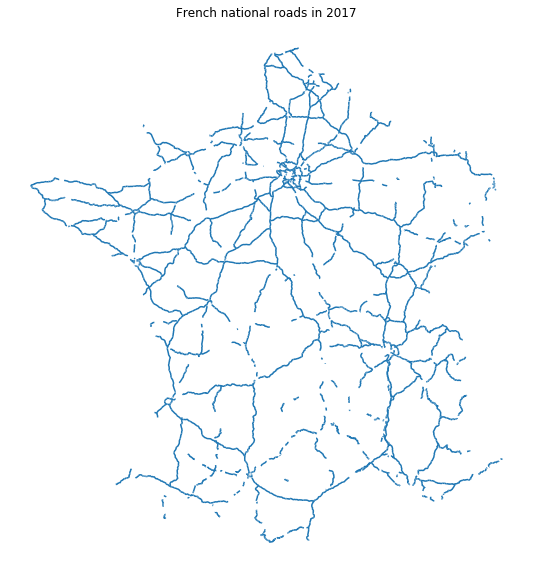

In [12]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = road_data.plot(ax=ax)
ax.set_axis_off()
ax.set_title('French national roads in 2017')
plt.show()

In [13]:
nb_roads = len(road_data['route'].unique())
print('Number of national french roads in 2017 :', nb_roads)

nb_measure_points = len(road_data['route_pr_id'].unique())
print('Number of measure points in 2017 :', nb_measure_points)

Number of national french roads in 2017 : 247
Number of measure points in 2017 : 3776


## Set up graphic functions

In [17]:
def config_plot():
    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    return fig, ax
    

def pie_chart(labels, values, title=None):    
    fig, ax = config_plot()
    colors = sns.color_palette("Blues", len(labels))
    ax.pie(values, labels=labels, colors=colors, shadow=True, startangle=130)
    ax.axis('equal')
    ax.legend(loc=0, frameon=True)
    if title != None:
        ax.set_title(title)
    plt.show()


def bar_plot(labels, values, title=None):
    fig, ax = config_plot()
    ax.bar(labels, values)
    if title != None:
        ax.set_title(title)
    plt.show()        

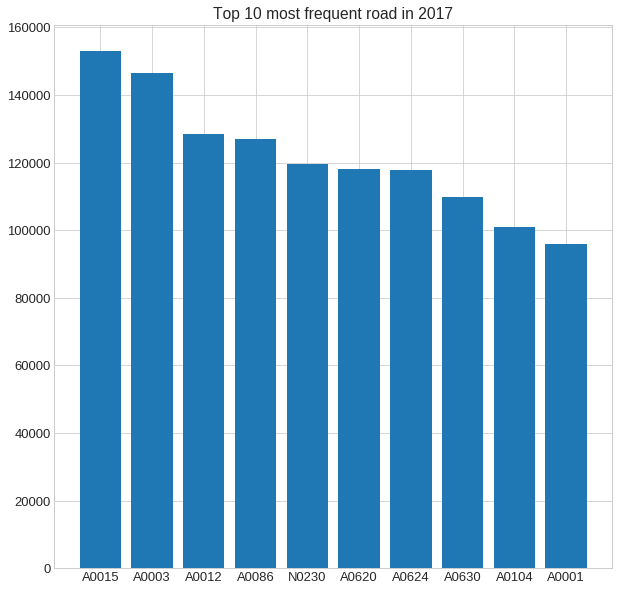

In [18]:
avg_freq_roads = road_data.groupby('route')['tmja'].mean()
avg_freq_roads_top_10 = avg_freq_roads.sort_values(ascending=False)[0:10]
bar_plot(avg_freq_roads_top_10.index, avg_freq_roads_top_10.values, title='Top 10 most frequent road in 2017')

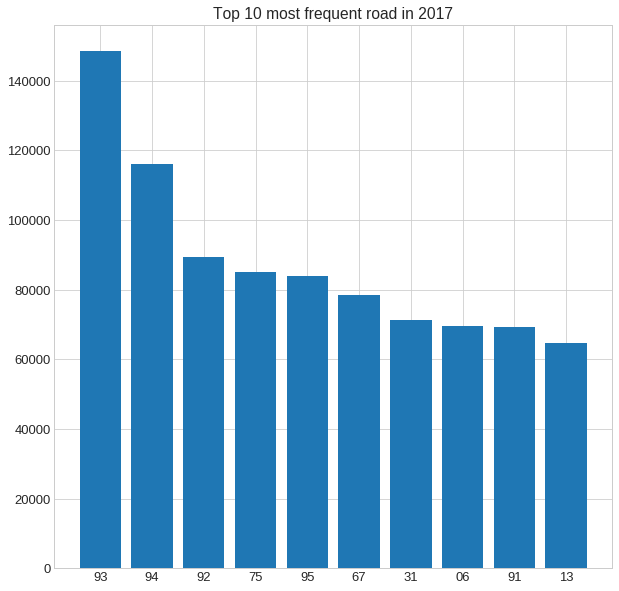

In [19]:
avg_freq_dep = road_data.groupby('depPrD')['tmja'].mean()
avg_freq_dep_top_10 = avg_freq_dep.sort_values(ascending=False)[0:10]
bar_plot(avg_freq_dep_top_10.index, avg_freq_dep_top_10.values, title='Top 10 most frequent road in 2017')

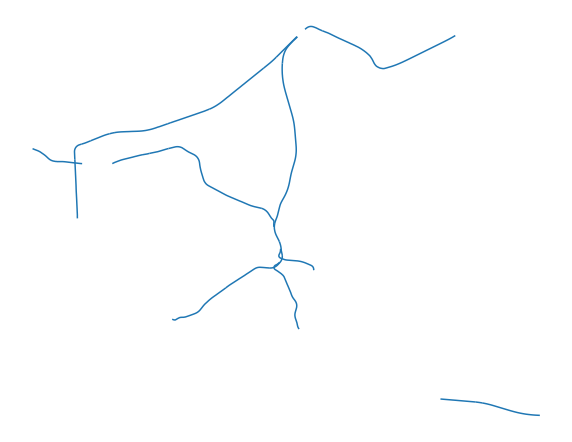

In [20]:
fig, ax = config_plot()
roads_93 = road_data[road_data['depPrD'] == '93']
roads_93.plot(ax=ax)
ax.set_axis_off()
plt.show()

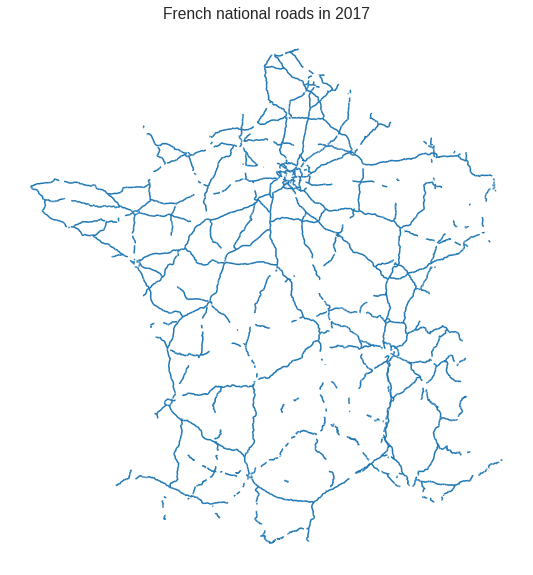

In [21]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = road_data.plot(ax=ax)
ax.set_axis_off()
ax.set_title('French national roads in 2017')

plt.savefig('french_map.png')
plt.show()

In [76]:
from pyproj import Proj, transform
inProj = Proj(init='epsg:2154')
outProj = Proj(init='epsg:4326')


df_coords = {}

for i, row in road_data.iterrows():
    df_coords[row['route_pr_id']] = {}
    coords = [transform(inProj,outProj,c[0],c[1]) for c in row['geometry'].coords]
    x = [round(c[0],8) for c in coords]
    y = [round(c[1],8) for c in coords]
    df_coords[row['route_pr_id']]['x'] = x
    df_coords[row['route_pr_id']]['y'] = y


KeyboardInterrupt: 

In [77]:
for c in df_coords:
    print(c)

A0001_0_2
A0001_2_3
A0001_3_3
A0001_3_4
A0001_4_4
A0001_4_6
A0001_6_7
A0001_7_8
A0001_8_11
A0001_11_12
A0001_12_0
A0001_14_18
A0001_18_18
A0001_20_20
A0001_20_27
A0001_27_30
A0001_30_32
A0001_32_42
A0001_42_44
A0001_44_50
A0001_50_57
A0001_57_57
A0001_57_66
A0001_66_80
A0001_80_92
A0001_92_101
A0001_101_118
A0001_118_121
A0001_121_131
A0001_131_136
A0001_136_138
A0001_138_146
A0001_146_165
A0001_165_170
A0001_170_171
A0001_171_174
A0001_174_182
A0001_187_0
A0002_0_3
A0002_3_4
A0002_4_5
A0002_5_23
A0002_23_23
A0002_23_29
A0002_29_42
A0002_43_48
A0002_48_52
A0002_52_59
A0002_59_60
A0002_60_64
A0002_64_78
A0003_0_2
A0003_2_5
A0003_5_5
A0003_5_6
A0003_6_7
A0003_7_13
A0003_13_15
A0003_15_0
A0004_0_0
A0004_0_2
A0004_2_3
A0004_3_4
A0004_4_5
A0004_5_6
A0004_6_6
A0004_6_7
A0004_7_9
A0004_9_12
A0004_12_12
A0004_13_15
A0004_15_15
A0004_15_18
A0004_18_18
A0004_18_19
A0004_19_20
A0004_20_21
A0004_21_24
A0004_24_31
A0004_31_34
A0004_34_35
A0004_35_38
A0004_40_54
A0004_54_64
A0004_64_67
A0004_67_85
A

In [80]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
))

for c in df_coords:
    if c == 'A0004_170_179':
        continue
    fig.add_trace(go.Scattermapbox(
        mode = "lines",
        fillcolor='red',
        lon = df_coords[c]['x'],
        lat = df_coords[c]['y'],
        marker = {'size': 10}))

                      
fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': 10, 'lat': 10},
        'style': "stamen-terrain",
        'center': {'lon': -20, 'lat': -20},
        'zoom': 1})

fig.show()